<a href="https://colab.research.google.com/github/alaaguedda/python-Colab-Trainer/blob/main/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list  # To check popular datasets
!kaggle datasets download -d <dataset-id>
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download -d adilshamim8/salaries-for-data-science-jobs
!unzip salaries-for-data-science-jobs.zip
df = pd.read_csv("salaries.csv")  # Use the actual file name if different
df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

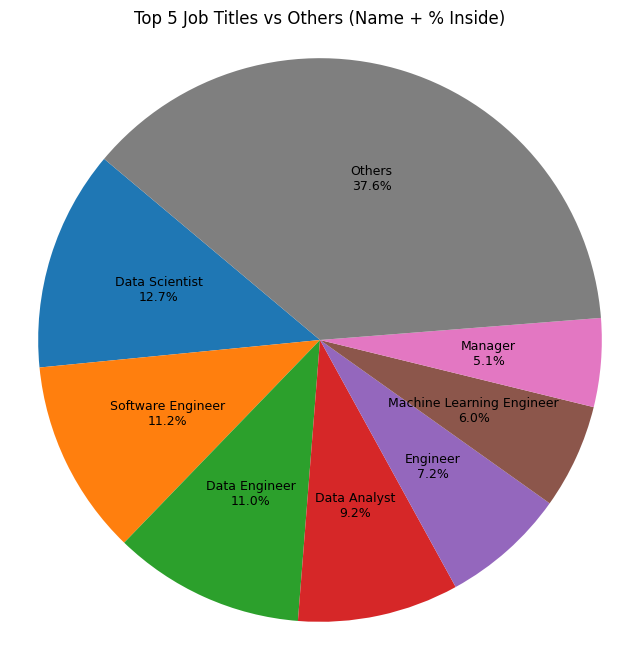

In [71]:
df_clean = df.dropna(subset= ['job_title'])

job_counts = df_clean['job_title'].value_counts()
top5 = job_counts[:7]
others = job_counts[7:].sum()

final_counts = pd.concat([top5 , pd.Series({'Others':others})])

plt.figure(figsize=(8, 8))
def label_inside(pct, allvals):
    absolute = int(round(pct/100 * sum(allvals)))
    index = list(final_counts.values).index(absolute)
    return f"{final_counts.index[index]}\n{pct:.1f}%"

plt.pie(
    final_counts,
    labels=None,
    autopct=lambda pct: label_inside(pct, final_counts),
    startangle=140,
    textprops={'fontsize': 9}
)
plt.title("Top 5 Job Titles vs Others (Name + % Inside)")

plt.axis("equal")
plt.show()

In [ ]:
top5_saleries = df.sort_values(by='salary_in_usd', ascending =False)
top5_saleries[['job_title','company_location','salary_in_usd']].head(10)

In [ ]:
df_exp = df.groupby('experience_level')['salary_in_usd'].mean()
df_exp.sort_values()

In [ ]:
df_exp_job = df['experience_level'].value_counts().sort_index()

df_exp_job.plot(kind = 'bar')
plt.title('job titles for experiance')
plt.xlabel('expeciance level')
plt.ylabel('job')
plt.grid(axis='y')
plt.show()

In [ ]:
bins = [0, 10000, 30000, 50000, 70000, 90000, 120000, 150000, 200000, 250000, 300000, 350000, float('inf')]

# Define readable labels for those ranges
labels = [
    '<10k', '10k-30k', '30k-50k', '50k-70k', '70k-90k', '90k-120k', '120k-150k',
    '150k-200k', '200k-250k', '250k-300k', '300k-350k', '>350k'
]

df['salary_range'] = pd.cut(df['salary_in_usd'] , bins=bins ,labels = labels ,right= False)
df

In [ ]:
salary_count = df['salary_range'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
salary_count.plot(kind='bar')
plt.title('Salary Distribution by Custom Ranges')
plt.xlabel('Salary Range (USD)')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x='employment_type',y='salary_in_usd')
plt.xlabel('employment')
plt.ylabel('salary')
plt.show()

In [ ]:
remote = df['remote_ratio'].value_counts()
remote.plot(kind = 'pie')


In [ ]:
avg_Salary = df.groupby('job_title')['salary_in_usd'].median().sort_values( ascending =False)
top10_avg = avg_Salary.head(10)
top10_avg.plot(kind='barh')
plt.show()

In [ ]:
sal_country = df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending = False)
sal_country

In [ ]:
filt = df[df['remote_ratio'].isin([0,100])]
remote_comp = filt.groupby('remote_ratio')['salary_in_usd'].median()

plt.pie(

    remote_comp,
    labels=remote_comp.index,
    startangle=140,
    autopct= '%1.1f%%',
    textprops={'fontsize': 9}
)

<Axes: xlabel='work_year'>

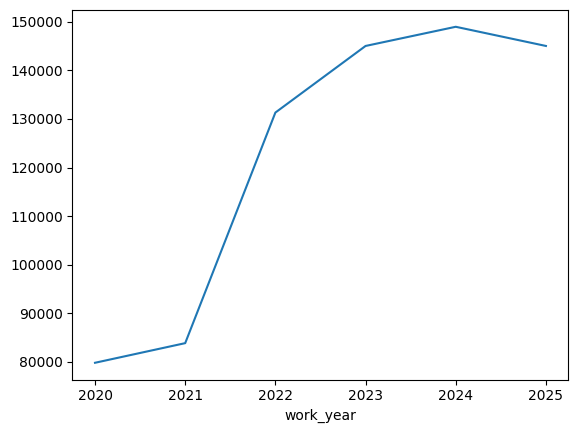

In [84]:
avg_year = df.groupby('work_year')['salary_in_usd'].median()
avg_year.plot(kind='line')
